In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = np.load("scan.npz")["data"]
configures = []
for i in np.linspace(0.1,1,10):
    configures.append((f"omega_{i:0.3f}",i))

traj_len = np.zeros((len(data),len(data[0])))

for i, d_i in enumerate(data):
    for j, d_j in enumerate(d_i):
        traj_len[i,j] = np.size(d_j[:,0]) - np.count_nonzero(np.isnan(d_j[:,0]))
        
print(traj_len)
order = [0,1,2,3,4,5,6,7,8,9]
score = data[:,:,:,2]
sfr = data[:,:,:,1]
d_e = data[:,:,:,0]
score[np.isnan(score)] = 1000
sfr[np.isnan(sfr)] = 1e-34
d_e[np.isnan(d_e)] = 1000
data_best_score = np.min(score,axis = 2)
data_best_sfr = np.max(sfr,axis = 2)
data_best_d_e = np.min(d_e,axis = 2)
data_best_score_arg = np.argmin(score,axis = 2)
data_best_sfr_arg = np.argmax(sfr,axis = 2)
data_best_d_e_arg = np.argmin(d_e,axis = 2)
print(np.unravel_index(np.argmax(data_best_sfr[:,:6]),data_best_sfr[:,:6].shape))
print(data_best_sfr[8,1])
print(data.shape)

[[119.  50.  45.  47.  55.  60. 207. 183. 131. 168.]
 [302. 127. 302. 209. 302.   0.   0.   0.   0.   0.]
 [ 69.  66.  72. 217. 123. 124. 119. 233. 302. 302.]
 [ 84.  51.  47.  43.  48.  52.  59.  66.  60.  78.]
 [136. 139. 163. 181.   0.   0.   0.   0.   0.   0.]
 [156. 157. 189. 302. 302. 302. 219. 211.   0.   0.]
 [ 82.  75.  80. 167. 302. 302. 257. 302.   0.   0.]
 [ 58.  65.  61.  69.  76.  98.  82. 102. 134. 159.]
 [180. 185. 302. 302. 159. 131. 117.   0.   0.   0.]
 [302.  86.  67.  72.  74.  70.  89.  89. 120.   0.]
 [ 94. 132. 141. 142. 194. 112. 108. 117. 134. 302.]
 [ 53.  56.  57.  60.  59.  64.  80.  72.  83.  76.]
 [ 86.  93.  91. 106.   0.   0.   0.   0.   0.   0.]
 [ 90. 147.  94. 123. 130. 127.  89. 110. 105. 110.]
 [ 61.  57.  52. 149.  82.  53.  52. 260. 148. 302.]
 [ 76. 180. 191. 203. 185. 206.   0.   0.   0.   0.]
 [ 72.  85.  93.  74.  79.  76.  86.  72.  88.  82.]
 [ 36.  50.  52.  52.  58.  58.  70.  73. 302. 302.]
 [ 42.  56.  42.  53.  61.  69.  65.  71.  73.

In [40]:
def plot_sf_E(xlabel, x_coord, index, shift = 0.02, connected = True, tick_labels = None, 
              selector = data_best_score_arg, log_scale = True, log_scale_E = False):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(8,6))
    #mean_max_sfr = np.mean(np.log(data_best_sfr[:,index]), axis = 0)
    #std_max_sfr = np.std(np.log(data_best_sfr[:,index]), axis = 0)

    #mean_best_d_E = np.mean(data_best_d_e[:,index], axis = 0)
    #std_best_d_E = np.std(data_best_d_e[:,index], axis = 0)
    max_sfr = np.zeros((len(data),len(index)))
    best_d_E = np.zeros((len(data),len(index)))
    mask = best_d_E == 0
    for idx_i, i in enumerate(index):
        for j in range(len(data)):
            max_sfr[j,idx_i] = data[j,i,selector[j,i],1]
            best_d_E[j,idx_i]= data[j,i,selector[j,i],0]
            if max_sfr[j,idx_i] == 1e-34:
                mask[j,idx_i] = False
                
    mean_max_sfr = np.mean(np.log(max_sfr), axis = 0)
    std_max_sfr = np.std(np.log(max_sfr), axis = 0)
    
    mean_max_sfr = np.zeros((len(index)))
    std_max_sfr = np.zeros((len(index)))
    for idx_i, i in enumerate(index):
        mean_max_sfr[i] = np.mean(np.log(max_sfr[:,i][mask[:,i]]))
        std_max_sfr[i] = np.std(np.log(max_sfr[:,i][mask[:,i]]))
    
    mean_best_d_E = np.mean(best_d_E, axis = 0)
    std_best_d_E = np.std(best_d_E, axis = 0)
    mean_best_d_E = np.zeros((len(index)))
    std_best_d_E = np.zeros((len(index)))
    for idx_i, i in enumerate(index):
        mean_best_d_E[i] = np.mean(best_d_E[:,i][mask[:,i]])
        std_best_d_E[i] = np.std(best_d_E[:,i][mask[:,i]])
    
    max_sfr_normed = mean_max_sfr
    max_sfr_normed = (max_sfr_normed-np.min(max_sfr_normed))/(np.max(max_sfr_normed)-np.min(max_sfr_normed))
    
    best_d_E_normed = mean_best_d_E
    best_d_E_normed = (best_d_E_normed-np.min(best_d_E_normed))/(np.max(best_d_E_normed)-np.min(best_d_E_normed))
    print(f"Highest Hysteresis: omega = {x_coord[np.argmax(max_sfr_normed-best_d_E_normed)]:.3f}")
    
    if log_scale:
        shift = 0
    
    draw = "--o"
    if not connected:
        draw = "o"

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(r"log(SFC)", color=color)
    
    ax1.errorbar(x_coord-shift, mean_max_sfr, yerr=std_max_sfr, capsize=3, fmt=draw, ecolor = color, color= color, alpha =0.7)
    ax1.tick_params(axis='y', labelcolor=color)
    if not tick_labels == None:
        plt.xticks(x_coord,tick_labels)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel(r"$\Delta E$", color=color)  # we already handled the x-label with ax1
    ax2.errorbar(x_coord+shift, mean_best_d_E, yerr=std_best_d_E, capsize=3, fmt=draw, ecolor = color, color= color, alpha =0.7)
    ax2.tick_params(axis='y', labelcolor=color)
    if log_scale:
        plt.xscale('log')
    if log_scale_E:
        ax2.set_yscale('log')
    fig.tight_layout()

In [19]:
def plot_sf_E_single(xlabel, x_coord, index, shift = 0.02, connected = True, tick_labels = None, n_mol = 10,
                     selector = data_best_score_arg, log_scale = True, ):
    plt.rcParams.update({'font.size': 22})
    max_sfr = np.zeros((len(data),len(index)))
    best_d_E = np.zeros((len(data),len(index)))
    for idx_i, i in enumerate(index):
        for j in range(len(data)):
            max_sfr[j,idx_i] = data[j,i,selector[j,i],1]
            best_d_E[j,idx_i]= data[j,i,selector[j,i],0]
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(r"log(SFR)", color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    if not tick_labels == None:
        plt.xticks(x_coord,tick_labels)
    

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel(r"$\Delta E$", color=color)  # we already handled the x-label with ax1
    for i in range(n_mol):
        line,  = ax1.plot(x_coord, np.log(max_sfr[i]),"-")
        ax2.plot(x_coord, best_d_E[i],'--',color=line.get_color())
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.legend([r"log(SFR)"],loc=3)
    ax2.legend([r"$\Delta E$"],loc=4)
    if log_scale:
        plt.xscale('log')
    fig.tight_layout()

Highest Hysteresis: omega = 0.200


<Figure size 800x600 with 0 Axes>

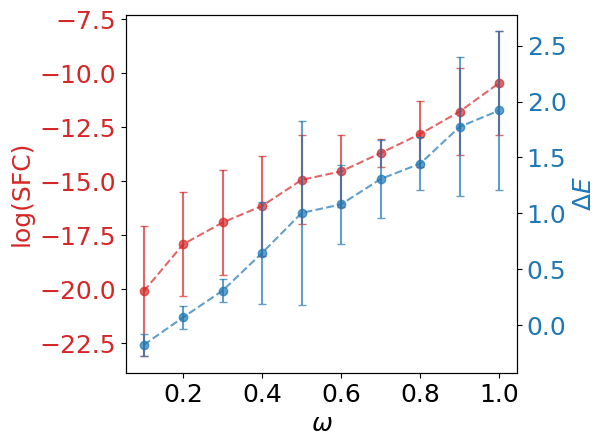

In [41]:
plot_sf_E(r"$\omega$", np.array([configures[w][1] for w in order]), order, shift = 0.0, log_scale = False, log_scale_E = False)
plt.savefig("plot_sf_E_omega_scan.png", dpi = 300)

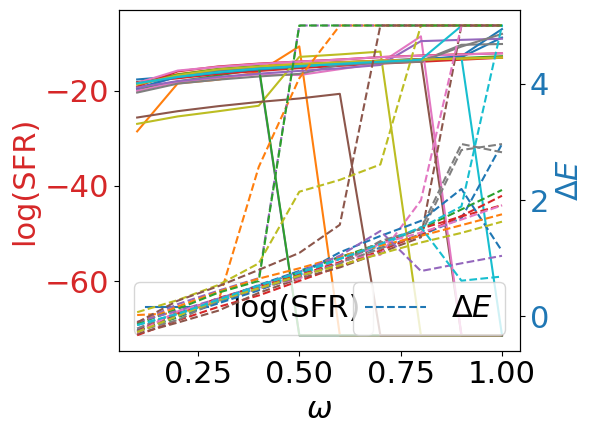

In [21]:
plot_sf_E_single(r"$\omega$", np.array([configures[w][1] for w in order]), order, n_mol = 20, log_scale = False)

<Figure size 800x600 with 0 Axes>

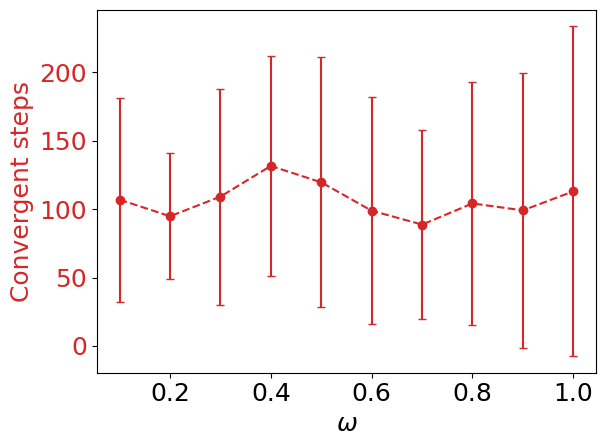

In [39]:
xlabel = r"$\omega$"
x_coord = np.array([configures[w][1] for w in order])
index = order
shift = 0.02
connected = True
selector = data_best_score_arg
log_scale = False

plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8,6))

traj = np.zeros((len(data),len(index)))
for idx_i, i in enumerate(index):
    for j in range(len(data)):
        traj[j,idx_i] = traj_len[j,i]


mean_traj = np.mean(traj, axis = 0)
std_traj = np.std(traj, axis = 0)

if log_scale:
    shift = 0

draw = "--o"
if not connected:
    draw = "o"

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(r"Convergent steps", color=color)

ax1.errorbar(x_coord, mean_traj, yerr=std_traj, capsize=3, fmt=draw, ecolor = color, color= color)
ax1.tick_params(axis='y', labelcolor=color)


if log_scale:
    plt.xscale('log')
fig.tight_layout()
plt.savefig("plot_convergence_omega_scan.png", dpi = 300)